In [2]:
using SymPy
using Plots
using LaTeXStrings
using LinearAlgebra
using Latexify
using Formatting
using Printf
using SpecialFunctions
logspace(from, to, len) = exp10.(range(from, stop=to, length=len))
set_default(fmt = FancyNumberFormatter(3))

default(framestyle=:box, widen=false)

# Berechnung der Dipolfelder im Zeitbereich

Bisher haben wir Felder in Abhängigkeit von Ort und Frequenz untersucht. Dies ist adäquat, solange wir zeitharmonische Dipolanregung mit einer Zeitabhängigkeit des Dipolmoments von $e^{i\omega t}$ betrachten, also

$$
\mathbf m(\mathbf r, \omega) = \mathbf m(\mathbf r) e^{i\omega t}.
$$

Die Zusammenhänge werden sofort andere, wenn wir stattdessen sprunghafte Änderungen des Dipolmomentes zulassen, z.B.

$$
\mathbf m(\mathbf r, t) = \mathbf m(\mathbf r) \delta(t)
$$
oder
$$
\mathbf m(\mathbf r, t) = \mathbf m(\mathbf r) u(t).
$$

$u(t)$ ist die *Heavisidesche Sprungfunktion*
\begin{equation}\label{eq:}
u(t) = 
\begin{cases}
0 & t < 0 \\
1 & t > 0.
\end{cases}
\end{equation}
***
Die folgenden Abbildungen zeigen die Heavisidefunktion $u(t)$ sowie das Resultat der Zeitintegration der Diracschen Deltafunktion $\delta(t)$.

Wir verwenden die symbolischen Ausdrücke `t` für die Zeit sowie `Heaviside` und `DiracDelta` für Sprungfunktion bzw. Diracsche Deltafunktion. Weiterhin benutzen wir die Funktion `integrate` zum symbolischen Integrieren.

In [3]:
@syms t

(t,)

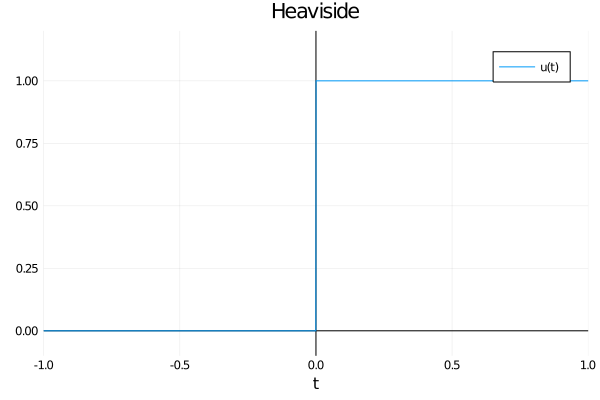

In [4]:
plot(Heaviside(t), -1, 1,
    label="u(t)", 
    title="Heaviside", framestyle=:zerolines)
xlabel!("t")
ylims!(-0.1,1.2)

Das folgende Bild zeigt das Resultat der Zeitintegration der Diracschen Deltafunktion, wobei das Integral über $\delta(t)$ von $-\infty$ bis $t$ dem Wert einer Funktion zum Zeitpunkt $t$ zugeordnet wird.

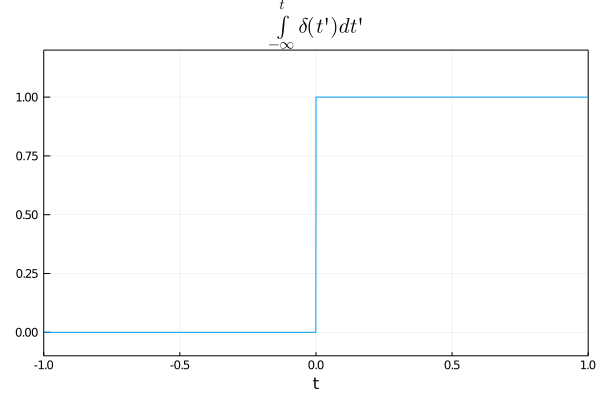

In [5]:
plot(integrate(DiracDelta(t), t), -1, 1, 
    label="", 
    title=L"\int_{-\infty}^t\delta(t') dt' ")
xlabel!("t")
ylims!(-0.1, 1.2)

Beide Abbildungen zeigen offensichtlich das gleiche Resultat. Also gilt
\begin{equation}
u(t) = \int\limits_{-\infty}^t \delta(t') \, dt.
\end{equation}

***
Wir können das Resultat mittels symbolischer Mathematik nachvollziehen.

(In `SymPy.jl` hat die Heavisidefunktion das Symbol $\theta$.)

In [6]:
integrate(DiracDelta(t), t)

θ(t)

Umgekehrt gilt für die Zeitableitung der Heavisidefunktion
\begin{equation}
\frac{d}{dt}u(t) = \delta(t),
\end{equation}
wovon wir uns durch symbolische Differentiation überzeugen können:

In [7]:
diff(Heaviside(t), t)

δ(t)

### Begriffe
Wir werden im Zeitbereich zwei wichtige Begriffe verwenden, nämlich
* Sprungfunktionsantwort
* Impulsantwort.

Diese Begriffe beziehen sich auf die spezielle Zeitabhängigkeit des Dipolmoments.

Allgemein ist das Dipolmoment eine Funktion des Ortes und der Zeit, also $\mathbf m(\mathbf r, t) = \mathbf q(\mathbf r) I(t)$. Dabei beschreibt $\mathbf q(\mathbf r)$ die genaue Lage des stromführenden Kabels (z.B. einer großen horizontal ausgelegten Spule an der Erdoberfläche) und $I(t)$ den zeitlichen Verlauf des Stromes in dieser Spule.

In weiterer Folge betrachten wir lediglich die Zeitabhängigkeit des Dipolmoments, also $I(t)$.

#### Sprungfunktionsantwort

Die Felder, die wir als direkte Folge des Ein- oder Ausschaltens des Dipolmoments messen können, nennen wir *Sprungfunktionsantwort*. 

Eine Stromfunktion der Form

$$
I(t) = I_0 u(t)
$$

beschreibt das Einschalten eines Stromes in der Quelle zum Zeitpunkt $t=0$ in Form einer Sprungfunktion. Die für $t > 0$ beobachteten Felder $\mathbf e(t)$ und $\mathbf h(t)$ nennt man Sprungfunktionsantwort. Gemessen werden diese Felder mit Elektroden bzw. Magnetometern.

#### Impulsantwort
Die impulsförmige Stromfunktion

$$
I(t) = I_0 \delta(t)
$$

lässt sich apparativ und messtechnisch leider nicht realisieren.

Interessant ist folgender Gedanke: Misst man Magnetfelder mit Induktionsspulen, ist die eigentliche Messgröße eine in der Messspule induzierte elektrische Spannung, welche proportional zur zeitlichen Änderung des Magnetfelds ist.

Induktionsspulen erfassen also die Zeitableitung der Sprungfunktionsantwort!

Wie kann dieser Zusammenhang beschrieben werden?

Wir haben oben bereits gelernt, dass die Integration der Diracschen Deltafunktion bzgl. der Zeit die Heavisidesche Sprungfunktion liefert.
Andererseits liefert die Zeitableitung der Sprungfunktion die Deltafunktion, also einen *Dirac-Impuls*.

Dies wenden wir auf die Felder an:

| Feldgröße    | Zeitabhängigkeit der Quelle  | Begriff |
|----------------|------------------|-------------------|
| $\mathbf e(t),\mathbf b(t)$ |           $u(t)$ |  Sprungfunktionsantwort |
| $\frac{d}{dt} \mathbf b(t)$ | $\frac{d}{dt} u(t)$ | Impulsantwort |
| $\frac{d}{dt} \mathbf b(t)$ | $\delta(t)$ | Impulsantwort |

#### Differentiation, Integration, Faltung

Wir leiten nun eine wichtige Beziehung zwischen der Impuls- und Sprungfunktionsantwort her.

Sei $h(t)$ die Impulsantwort.

Dann erhalten wir die [Sprungfunktionsantwort](https://de.wikipedia.org/wiki/Sprungantwort) $f(t)$ aus der *Faltung* der Impulsantwort $h(t)$ mit der Heavisidefunktion $u(t)$:

\begin{equation}
\label{eq:f}
f(t)=h * u(t)=u * h(t)=\int_{-\infty}^{\infty} h(t') u(t-t') d t' =\int_{-\infty}^{t} h(t') d t'
\end{equation}


Die Sprungfunktionsantwort zum Zeitpunkt $t$ ist also das Resultat der Zeitintegration über die Impulsantwort von $-\infty$ bis $t$.
***
Im folgenden Beispiel nehmen wir an, dass die Impulsantwort $h(t) = e^{-t^2}$ ist.

In [8]:
h(t) = exp(-t^2)

h (generic function with 1 method)

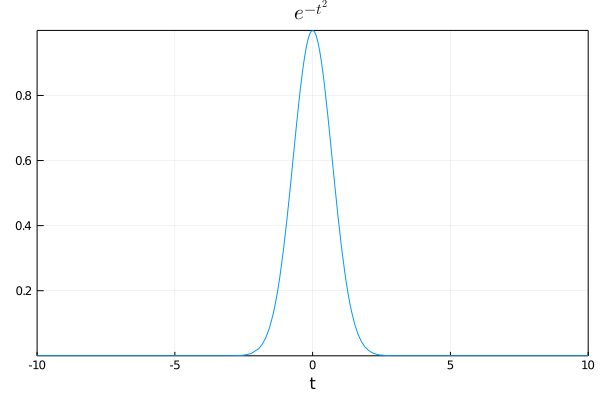

In [9]:
plot(h(t),-10, 10, title=L"e^{-t^2}", label="", xlabel="t")

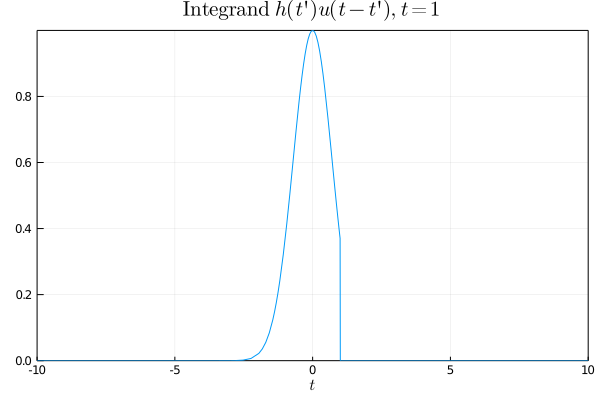

In [10]:
plot(h(t) * Heaviside(1.0 - t), -10, 10, 
    xlabel=L"t",
    label="",
    title=L"\mathrm{Integrand }~ h(t') u(t-t'), t=1")

***
Wir definieren symbolische Ausdrücke für die in Gl. (\ref{eq:f}) eingeführten Integrale zur Berechnung von $f(t)$:

$$
f_1(\tau) = \int_{-\infty}^{\infty} h(t') u(\tau-t') d t'
$$

In [11]:
f1(tau) = integrate(h(t) * Heaviside(tau - t), (t, -oo, oo))

f1 (generic function with 1 method)

$$
f_2(\tau) = \int_{-\infty}^{\tau} h(t') d t'
$$

In [12]:
f2(tau) = integrate(h(t), (t, -oo, tau))

f2 (generic function with 1 method)

(In `SymPy.jl` wird $\infty$ abgekürzt durch das Symbol `oo`.)

Wir überzeugen uns davon, dass die Integrale in (\ref{eq:f}) tatsächlich übereinstimmen.

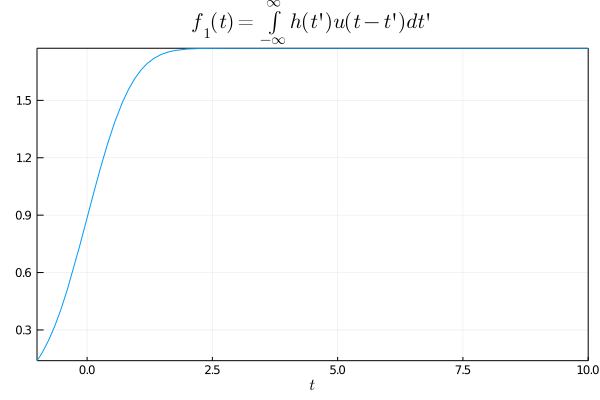

In [13]:
plot(f1, -1, 10, 
    xlabel=L"t",
    label="",
    title=L"f_1(t) = \int_{-\infty}^\infty h(t') u(t-t') dt'")

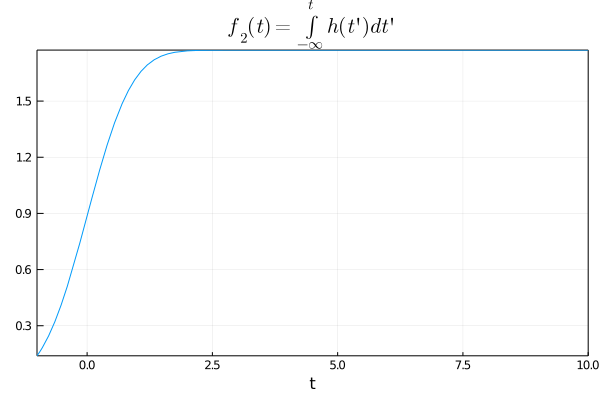

In [14]:
plot(f2, -1, 10, 
    xlabel="t",
    label="",
    title=L"f_2(t) = \int_{-\infty}^t h(t') dt'")

Wir sehen, dass beide Integrale die gleichen Werte liefern, also ist $f(t) = f_1(t) = f_2(t)$. Für die weiteren Rechnungen ist es hinreichend, das Integral

$$
f(t) = \int_{-\infty}^t h(t') dt'
$$

zu betrachten.

#### Kausale Systeme
In der Geophysik kommen nur kausale Systeme vor. Bei kausalen Vorgängen sind keine Felder messbar, bevor die Quelle eingeschaltet wird. Die Wirkung wird zeitlich nach der Ursache beobachtet.

Die Sprungfunktionsantwort für *kausale Systeme* ist

$$
f_{\mathrm{on}}(t)=\int_{0}^{t} h(t') d t', \quad t \geq 0.
$$


In [15]:
f_on(tau) = integrate(h(t), (t, 0, tau))

f_on (generic function with 1 method)

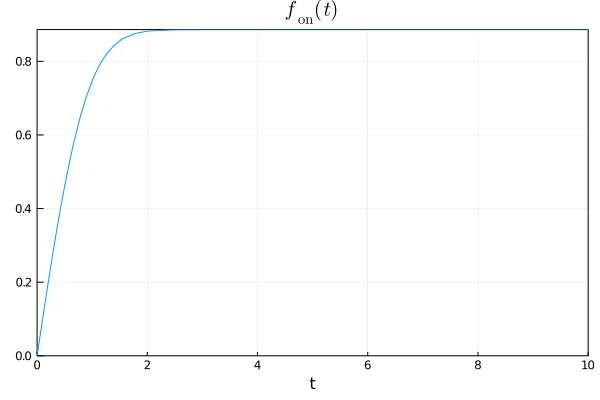

In [16]:
plot(f_on, 0, 10, label="", xlabel="t", title=L"f_\mathrm{on}(t)")

Mit $u(-t) = 1 - u(t)$ erhalten wir die Sprungfunktionsantwort für den *Ausschaltvorgang*, der vor allem in der Transientelektromagnetik, aber auch in der Methode der Induzierten Polarisation im Zeitbereich ein große Rolle spielt.

\begin{equation}
\label{eq:foff}
f_{\text {off }}(t) =\int_{t}^{\infty} h(t') d t' = \int_{0}^{\infty} h(t') d t' - \int_{0}^{t} h(t') d t', \quad t \geq 0
\end{equation}

Die Integrale lassen sich durch die Sprungfunktionsantwort für kausale Systeme $f_{\text {on }}(t)$ ausdrücken:

\begin{equation}
\label{eq:foff2}
f_{\text {off }}(t) = f_{\text {on }}(\infty) - f_{\text {on }}(t), \quad t \geq 0
\end{equation}

Das bedeutet, wir benötigen zur Berechnung der Sprungfunktionsantwort der Transientelektromagnetik lediglich eine Routine, welche die SFA für den Einschaltvorgang berechnen kann!

In [17]:
f_off(tau) = f_on(oo) - f_on(tau)

f_off (generic function with 1 method)

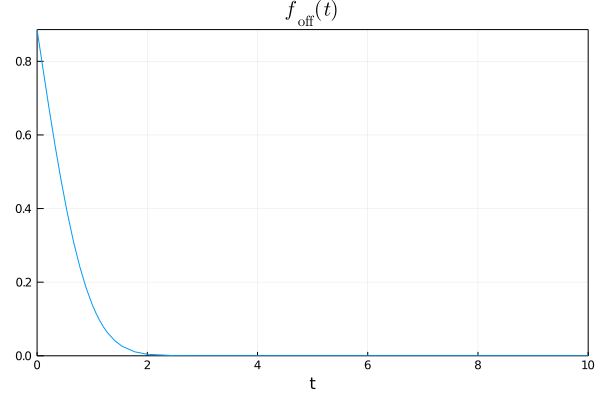

In [18]:
plot(f_off, 0, 10, label="", xlabel="t", title=L"f_\mathrm{off}(t)")

#### Diskussion der Abbildungen
Die Abbildung für $f_\text{on}(t)$ zeigt den typischen Verlauf eines Feldaufbaus nach Einschalten der Quelle. Wir beobachten eine Zunahme des Feldes und einen Übergang zu einem stationären Zustand für $t \to \infty$.

$f_\text{off}(t)$ zeigt ein Abklingverhalten des Feldes, bei dem der Anfangswert bei $t=0$ für $t > 0$ monoton abnimmt, um für $t \to \infty$ zu verschwinden.

***
Wir untersuchen nun den Zusammenhang zwischen Zeit- und Frequenzbereich.
Dazu benötigen wir die **Laplacetransformation** (LT) und ihre Rechenregeln.

Ausgangspunkt ist die Korrespondenz zwischen der rot-rot-Gleichung im Zeitbereich und im Frequenzbereich.


Im **Frequenzbereich** fordern wir von $F$ die Gültigkeit von

\begin{equation}
-\partial_{xx}^2 F + i\omega\mu\sigma F = -i\omega J^{e}
\end{equation}
mit
\begin{equation}
J^e(\omega) = q(\mathbf r).
\end{equation}

Im **Zeitbereich** erfüllt das Feld $f$ die PDE

\begin{equation}
-\partial_{xx}^2 f + \mu\sigma \partial_{t} f = -\partial_{t} j^{e}
\end{equation}
mit
\begin{equation}
j^e = q(\mathbf r) \delta(t).
\end{equation}

Im Frequenzbereich tritt in der Quellstromdichte keine explizite Abhängigkeit von der Frequenz auf.

Wir erkennen daraus, dass im Zeitbereich die Zeitabhängigkeit der Quellstromfunktion $j$ explizit durch einen Diracimpuls dargestelt werden kann.

Die Lösung der rot-rot-Gleichung im Frequenzbereich entspricht also der Fouriertransformation der Impulsantwort.

Um die Sprungfunktionsantwort im Frequenzbereich zu erhalten, beschreiben wir die explizite Zeitabhängigkeit von $j^e$ jetzt mit Hilfe der Sprungfunktion $u(t)$,

$$
j^e_s(t) = q(\mathbf r) u(t).
$$

Analog bilden wir die Fouriertransformierte des Quellterms mit Sprungfunktionsanregung:

$$
J^e_s(\omega) = q(\mathbf r) \left(\pi \delta(\omega) + \frac{1}{i \omega}\right)
$$

Die Sprungfunktionsantwort im Frequenzbereich, $F_s(\omega)$, erhält man also formal durch Multiplikation mit der Fouriertransformierten der Sprungfunktion

$$
F_s(\omega) = \left(\pi \delta(\omega) + \frac{1}{i \omega}\right) F(\omega).
$$

Die Fourierrücktransformation liefert schließlich die gewünschte Sprungfunktionsantwort im Zeitbereich,

$$
f_s(t) = \frac{1}{2\pi} \int\limits_{-\infty}^\infty 
\left(\pi \delta(\omega) + \frac{1}{i \omega}\right) F(\omega) e^{i\omega t} \, d\omega = \frac{F(0)}{2} + 
\frac{1}{2\pi} \int\limits_{-\infty}^\infty 
\frac{F(\omega)}{i\omega}
e^{i\omega t} \, d\omega
$$

Formal muss man also zum halben Wert des Feldes bei $\omega = 0$ die Fourierrücktransformation addieren, wobei die zu transformierenden Werte von $F$ mit $\frac{1}{i\omega}$ multipliziert werden.

Das entspricht der bekannten Rechenregel für die Integration.

Probleme dieser Art lassen sich elegant mit der Laplacetransformation lösen.

### Laplacetransformation

Gegeben sei eine in $t > 0$ definierte und beschränkte Funktion $f(t)$.

Auf $f(t)$ lässt sich die Laplacetransformation
$$
\mathcal L(f(x, t))=\int_{0}^{\infty} e^{-s t} f(x, t) d t \equiv F(x, s)
$$
mit $x$ als Parameter anwenden.

Der Laplaceparameter $s$ ist komplex und erweitert den imaginären Frequenzterm $i\omega$ der FT durch den Realteil $a$, so dass wir mit $s = a + i\omega$ über eine komplexwertige "Frequenz" verfügen. Auf diese Weise kann die Laplacetransformation auch mit instabilen Signalen $f$ umgehen, da für $t \to \infty$ der Realteil von $s$ dafür sorgt, dass der Integrand beschränkt ist. 

Im Zusammenhang mit partiellen Differentialgleichungen benötigen wir auch die LT der 
Zeitableitung von $f(t)$ ($f_t(x, t) = \partial_t f(x, t)$)

$$
\mathcal L(f_t(x, t)),
$$

welche wir mit dem oben eingeführten Laplaceintegral über partielle Integration ausrechnen:

\begin{align}
\mathcal L(f_t(x, t) & = \int\limits_{0}^{\infty} e^{-s t} f_{t}(x, t) d t \\ & = \left.e^{-s t} f(x, t)\right|_{0} ^{\infty}+s \int\limits_{0}^{\infty} e^{-s t} f(x, t) d t \\ & = s F(x, s)-f(x, 0).
\end{align}


Die folgende Tabelle enthält weitere wichtige Laplacetransformiertenpaare:

| $f(t)$     | $\mathcal L(f(t))$ |
|-----------------|---------------|
| $u(t-a)$        | $\frac{e^{-as}}{s}$ |
| $\delta(t-a)$   | $e^{-as}$ |
| $1$     | $\frac{1}{s}$ |

### Rücktransformation des elektrischen Feldes bei Sprungfunktionsanregung

Ausgangspunkt ist die Gleichung für das elektrische Feld eines magnetische Dipols im Vollraum.

Mit $r = |\mathbf r|$ gilt

$$
    \mathbf E(\mathbf r, \omega) = - \frac{i \omega \mu}{4 \pi r^3} \left(1 + i k r\right) e^{-i k r} \mathbf m \times \mathbf r
$$

Relevant für die Transformation sind alle Terme, die von der Frequenz abhängen. Abgesehen vom Faktor $i\omega$, den wir später behandeln, sind das

$$
e^{-ikr}, \quad ikr e^{-ikr}
$$

und zusätzlich noch

$$
\quad k^2 r^2 e^{-ikr}
$$

für das Magnetfeld.

Mit der Funktion $\Theta(t) = \sqrt{\frac{\mu\sigma}{4 t}}$ erhalten wir die folgenden Ausdrücke für die Laplacerücktransformation (s. [Abramowitz & Stegun](http://people.math.sfu.ca/~cbm/aands/page_1021.htm)):

$$
\mathcal L^{-1} \left( \frac{1}{s} e^{-ikr} \right) = \mathrm{erfc}(\Theta r)
$$

$$
\mathcal L^{-1} \left( \frac{ikr}{s} e^{-ikr} \right) = \frac{2}{\sqrt{\pi}} \Theta r e^{-\Theta^2 r^2}
$$

$$
\mathcal L^{-1} \left( \frac{k^2 r^2}{s} e^{-ikr} \right) = 
-\frac{4}{\sqrt{\pi}} \Theta^3 r^3 e^{-\Theta^2 r^2}
$$




#### Fehlerfunktion
Eine bedeutende Rolle spielt die [Fehlerfunktion](https://de.wikipedia.org/wiki/Fehlerfunktion) erf$(t)$. Ihre Definition lautet
$$
\mathrm{erf}(t) = \frac{2}{\sqrt{\pi}} \int_0^t e^{-\tau^2} d\tau.
$$
Die *komplementäre Fehlerfunktion* erfc$(t)$ ist
$$
\mathrm{erfc}(t) = 1 - \mathrm{erf}(t).
$$
***
Wir implementieren die Fehlerfunktion wieder mit `SymPy`.

In [19]:
erf(x) = 2 / sqrt(PI) * integrate(h(t),(t, 0, x))
erfc(x) = 1.0 - erf(x)

erfc (generic function with 1 method)

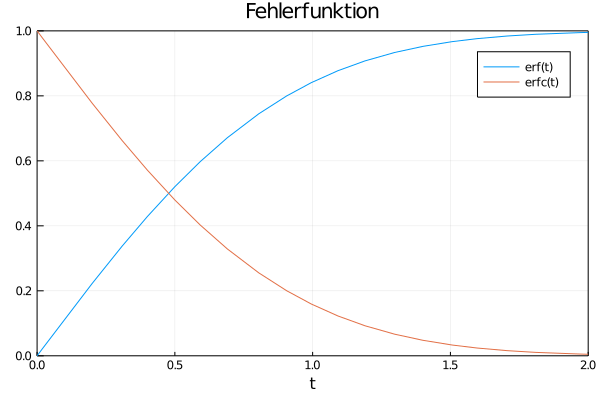

In [20]:
plot(erf, 0, 2, label="erf(t)", xlabel="t", title="Fehlerfunktion")
plot!(erfc, 0, 2, label="erfc(t)")

#### Zusammenfassen aller Terme

Nach der LT haben wir zunächst

$$
\mathbf e(\mathbf r, t) = -\partial_t \frac{\mu}{4 \pi r^3} \left(
\mathrm{erfc}(\Theta r) + \frac{2}{\sqrt{\pi}} \Theta r e^{-\Theta^2 r^2}
\right) \mathbf m \times \mathbf r.
$$

Die Ableitung nach der Zeit führen wir jetzt aus. Dazu benötigen wir wieder die Kettenregel.

In [21]:
@syms mu sigma r
Theta(t) = sqrt(mu * sigma / 4 / t)

Theta (generic function with 1 method)

In [22]:
chainrule(f, t) = subs(diff(f(Theta(t) => sqrt(mu * sigma / 4 / t)), t),
    sqrt(mu * sigma / 4 / t), Theta(t))

chainrule (generic function with 1 method)

In [23]:
simplify(chainrule(erfc(Theta(t)*r), t) + 2 / sqrt(PI) * chainrule(Theta(t) * r * exp(-Theta(t)^2 * r^2), t))

                      2   
                  -μ⋅r ⋅σ 
           _____  ────────
   3      ╱ μ⋅σ     4⋅t   
μ⋅r ⋅σ⋅  ╱  ─── ⋅ℯ        
       ╲╱    t            
──────────────────────────
               2          
         4⋅√π⋅t           

Diesen Term formen wir nochmals um

$$
\frac{2}{\sqrt{\pi} t} \Theta^3 r^3  e^{-\Theta^2 r^2}
$$

und erhalten mit den Vorfaktoren und dem Kreuzprodukt das endgültige Ergebnis für das elektrische Feld als Sprungfunktionsantwort:

$$
\mathbf e(\mathbf r, t) = -\frac{\mu}{4 \pi r^3} 
\frac{2}{\sqrt{\pi} t} \Theta^3 r^3  e^{-\Theta^2 r^2}
\mathbf m \times \mathbf r.
$$
***
Diese Funktion implementieren wir wieder in Julia.

In [24]:
function Et(r, m, t, sigma)
    mu = 4e-7 * pi
    x = r[1]
    y = r[2]
    z = r[3]
    R = norm(r)
    
    theta = sqrt(mu * sigma / 4.0 / t)
    tr = theta * R
    t2r2 = tr^2
    alpha = -mu / (4 * pi)
    
    E = alpha / R^3 * cross(m, r) * 
        2.0 * tr / (sqrt(pi) * t) * t2r2 * exp(-t2r2)

    return E, tr
end

Et (generic function with 1 method)

### Rücktransformation des Magnetfeldes bei Sprungfunktionsanregung

Ausgangspunkt ist wieder die Gleichung für das Magnetfeld im Frequenzbereich.

$$
    \mathbf H(\mathbf r) = \frac{1}{4 \pi r^3} \left[
    \frac{\mathbf m \cdot \mathbf r}{r^2} (3 + 3 i k r - k^2 r^2) \mathbf r - (1 + i k r - k^2 r^2) \mathbf m
    \right] e^{-i k r}.
$$

Mit den oben eingeführten Ausdrücken für die inverse Laplacetransformation erhalten wir zunächst das Magnetfeld im Zeitbereich:

\begin{align}
\begin{split}
\mathbf h(\mathbf r, t) = & \frac{1}{4 \pi r^3}
\left[
    \frac{\mathbf m \cdot \mathbf r}{r^2}
    \left(3 \mathrm{erfc}(\Theta r) + \left(\frac{6}{\sqrt{\pi}}\Theta r + \frac{4}{\sqrt{\pi}}\Theta^3 r^3\right)e^{-\Theta^2 r^2} 
    \right) \mathbf r \right. - \\
     & - \left. \left(
    \mathrm{erfc}(\Theta r) + \left(\frac{2}{\sqrt{\pi}}\Theta r + \frac{4}{\sqrt{\pi}}\Theta^3 r^3\right)e^{-\Theta^2 r^2}
    \right) \mathbf m
    \right]
    \end{split}
\end{align}

In [66]:
function Ht(r, m, t, sigma)
    mu = 4e-7 * pi
    x = r[1]
    y = r[2]
    z = r[3]
    R = norm(r)
    
    theta = sqrt(mu * sigma / 4.0 / t)
    tr = theta * R
    t2r2 = tr^2
    t3r3 = t2r2 * tr
    sqpi = sqrt(pi)
    alpha = 1.0 / (4 * pi * R^3)

    H = alpha * 
        (dot(m, r) / R^2  * r
            *
            (3 * SpecialFunctions.erfc(tr) +
                (6 * tr / sqpi + 4 * t3r3 / sqpi) * exp(-t2r2)) 
                .-
            (SpecialFunctions.erfc(tr) +
                (4 * t3r3 / sqpi + 2 * tr / sqpi) * exp(-t2r2)) 
        * m)

    return H
end

Ht (generic function with 1 method)

Bedeutsam ist jedoch die Zeitableitung des Magnetfeldes, weshalb wird noch nach der Zeit differenzieren. Mit der Kettenregel erhalten wir 

$$
    \partial_t \mathbf h(\mathbf r, t) = \frac{\Theta^3}{\sqrt{\pi}^3 t} \left[
    \Theta^2 r^2
    \frac{\mathbf m \cdot \mathbf r}{r^2} 
    \mathbf r - 
    (\Theta^2 r ^2 - 1) 
    \mathbf m
    \right] e^{-\Theta^2 r^2}.
$$

In [67]:
function dHdt(r, m, t, sigma)
    mu = 4e-7 * pi
    x = r[1]
    y = r[2]
    z = r[3]
    R = norm(r)
    
    theta = sqrt(mu * sigma / 4.0 / t)
    tr = theta * R
    t2r2 = tr^2
    sqpi = sqrt(pi)
    
    dHdt = theta^3 / sqpi^3 / t * exp(-t2r2) *
        (
            t2r2 * dot(m, r) * r / R^2 .+
            (1 - t2r2) * m
        )
    return dHdt
end

dHdt (generic function with 1 method)

In [78]:
m = [0, 0, 1]
sigma = 0.01
r = [100.0, 0.0, 0.0];

In [69]:
tt = logspace(-7, 0, 71)
nt = length(tt)
ee = zeros(size(tt))
hh = zeros(size(tt))
dh = zeros(size(tt))
thr = zeros(size(tt))
for i in 1:nt
    e_, thr[i] = Et(r, m, tt[i], sigma)
    h_ = Ht(r, m, tt[i], sigma)
    dh_ = dHdt(r, m, tt[i], sigma)
    ee[i] = e_[2]
    hh[i] = h_[3]
    dh[i] = dh_[3]
end

tstar = tt[findfirst(x -> x .< 1.0, thr)];

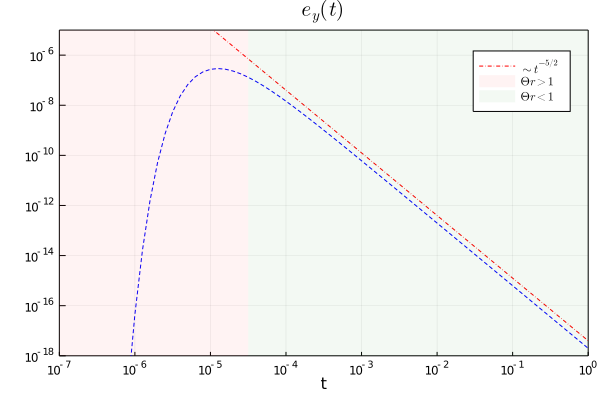

In [80]:
fneg = findall(x -> x .< 0.0, ee)
fpos = findall(x -> x .> 0.0, ee)
plot(tt[fpos], abs.(ee[fpos]), yaxis=:log, xaxis=:log, color="blue",
    linestyle=:solid, title=L"e_y(t)",
    xlabel="t", label="")
plot!(tt[fneg], abs.(ee[fneg]), linestyle=:dash, 
    color="blue", label="")
plot!(tt, 2 * abs(ee[end]) * tt.^(-2.5), 
    color="red", linestyle=:dashdot, label=L"\sim t^{-5/2}")
plot!([tt[1],tstar], label=L"\Theta r > 1", 
    opacity=0.05, color="red", seriestype=:vspan)
plot!([tstar, tt[end]], label=L"\Theta r < 1", 
    opacity=0.05, color="green", seriestype=:vspan)
ylims!((1e-18, 1e-5))

Der Richtungssinn des elektrischen Feldes stimmt überein mit dem aus dem Frequenzbereich.

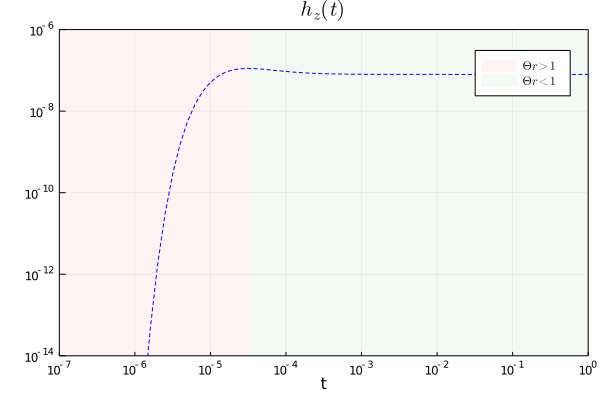

In [81]:
fneg = findall(x -> x .< 0.0, hh)
fpos = findall(x -> x .> 0.0, hh)
plot(tt[fpos], abs.(hh[fpos]), linestyle=:solid, color="blue",
    yaxis=:log, xaxis=:log, title=L"h_z(t)",
    xlabel="t", label="")
plot!(tt[fneg], abs.(hh[fneg]), 
    color="blue", linestyle=:dash, label="")
plot!([tt[1],tstar], label=L"\Theta r > 1", 
    opacity=0.05, color="red", seriestype=:vspan)
plot!([tstar, tt[end]], label=L"\Theta r < 1", 
    opacity=0.05, color="green", seriestype=:vspan)
ylims!((1e-14, 1e-6))

In [82]:
-1.0/(4*pi*100^3)

-7.957747154594767e-8

In [83]:
hh[end]

-7.957749262700399e-8

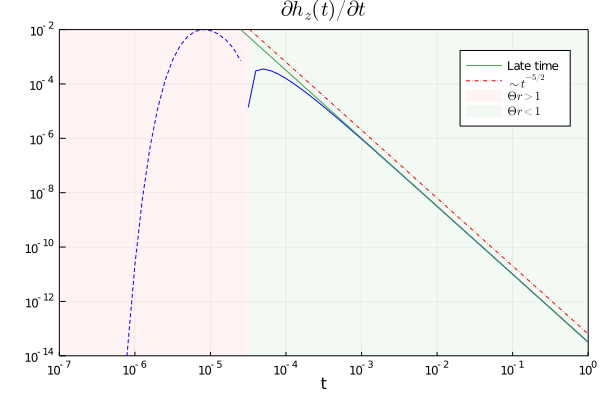

In [84]:
fneg = findall(x -> x .< 0.0, dh)
fpos = findall(x -> x .> 0.0, dh)
plot(tt[fpos], abs.(dh[fpos]), linestyle=:solid,
    yaxis=:log, xaxis=:log, title=L"\partial h_z(t)/\partial t", color="blue",
    xlabel="t", label="")
plot!(tt[fneg], abs.(dh[fneg]), color="blue", 
    linestyle=:dash, label="")
plot!(tt, (pi * 4e-7 * sigma / pi)^1.5 * tt.^(-2.5) / 8, label="Late time")
plot!(tt, 2 * dh[end] * tt.^(-2.5), label=L"\sim t^{-5/2}", 
linestyle=:dashdot, color="red")
plot!([tt[1],tstar], label=L"\Theta r > 1", 
    opacity=0.05, color="red", seriestype=:vspan)
plot!([tstar, tt[end]], label=L"\Theta r < 1", 
    opacity=0.05, color="green", seriestype=:vspan)
ylims!((1e-14, 1e-2))

#### Scheinbarer spezifischer Widerstand

Aus der Asymptotik von $\partial_t \mathbf h(t)$ lässt sich der spezifische Widerstand des Vollraums rekonstruieren.

Für $t \to \infty$ gilt die *Late-Time-Asymptotik*

$$
\partial_t \mathbf h^L(t) = \frac{\Theta^3(t)}{\sqrt{\pi}^3 t} = \frac{1}{8} \left(\frac{\mu\sigma}{\pi}\right)^{3/2} t^{-5/2} \mathbf m.
$$

Es besteht keine Abhängigkeit vom Abstand.

Wir können aus dem asymptotischen Verlauf die Leitfähigkeit rekonstruieren.

Es gilt z.B. für $\mathbf m = (0, 0, m_z)^\top$

$$
\sigma =  \frac{4 \pi}{\mu} \left( \frac{1}{m_z} \partial_t h_z(t) \right)^{2/3} t^{5/3}
$$

In [85]:
sig_a = zeros(size(tt))
mu0 = pi * 4e-7
for i = 1:length(tt)
    sig_a[i] = 4 * pi / mu0 * 
    abs(dh[i])^(2/3) * 
    tt[i]^(5/3)
end

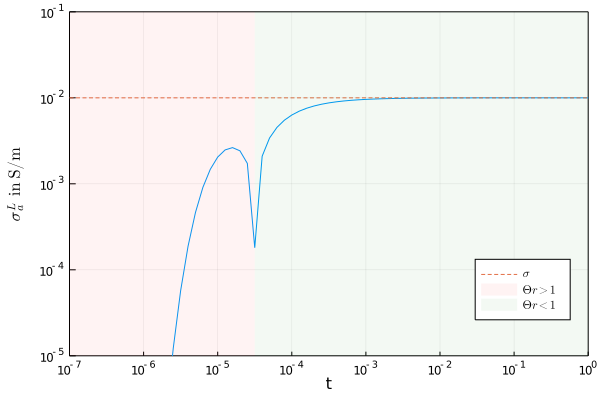

In [86]:
plot(tt, sig_a, xaxis=:log, yaxis=:log, 
    legend=:bottomright,
    label="", xlabel="t", ylabel=L"\sigma^L_a~\mathrm{ in~S/m}")
plot!(tt, sigma * ones(size(tt)), linestyle=:dash, label=L"\sigma")
plot!([tt[1],tstar], label=L"\Theta r > 1", 
    opacity=0.05, color="red", seriestype=:vspan)
plot!([tstar, tt[end]], label=L"\Theta r < 1", 
    opacity=0.05, color="green", seriestype=:vspan)
ylims!((1e-5, 1e-1))

In [75]:
hh[end]

-7.957749262700399e-8

In [76]:
hzlim = -1.0 / (4 * pi * 100^3)

-7.957747154594767e-8

In [77]:
hh[end] - hzlim

-2.1081056311729717e-14